In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


# NEMO-MEDUSA info

5-day means from 01-05-2000 until 31-12-2010

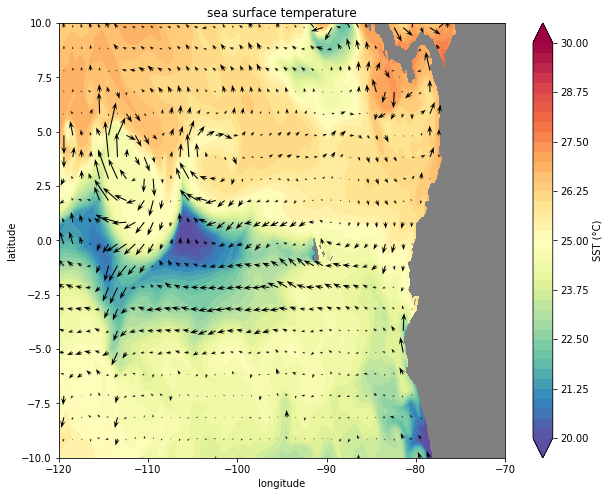

In [12]:
# plot SST + quiver of specific date

ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
ddate = 20000110
map_crop = [2000, 3001, 1000, 2001]

Field = ReadNemo(ddir,ddate)
lon = Field['lon']
lat = Field['lat']
Uvel = Field['Uvel']
Vvel = Field['Vvel']
Tvel = Field['Tvel']

PlotSSTquiver(lon,lat,Tvel,Uvel,Vvel)
plt.savefig('../../results/figures/NEMO_SSTquiver_20000105.pdf')

AttributeError: 'numpy.ndarray' object has no attribute 'cax'

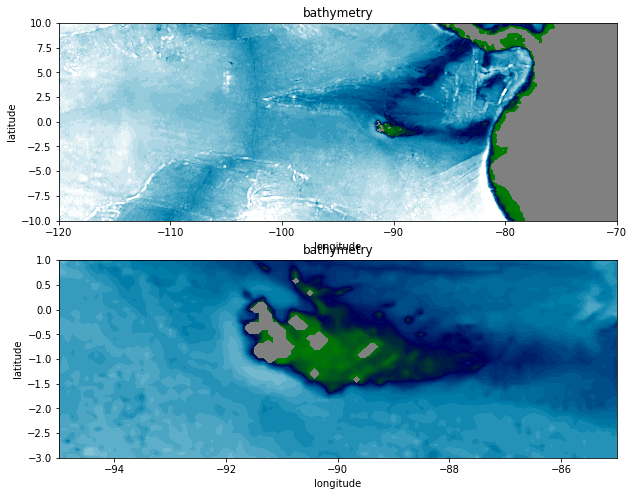

In [11]:
# plot bathymetry 
latdim = np.arange(1000,2001)
londim = np.arange(2000,3001)

bathy_file = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/domain/bathymetry_ORCA12_V3.3.nc'
dfile = Dataset(bathy_file)
bathy = dfile.variables['Bathymetry'][latdim,londim]
lat = dfile.variables['nav_lat'][latdim,londim]
lon = dfile.variables['nav_lon'][latdim,londim]
bathy = np.where(bathy<1, nan, bathy)



fig, ax = plt.subplots(2,1,figsize=(10, 8))

map_extent = [-120,-70,-10,10]
levels = np.linspace(10, 4500, 41)
fig1 = ax[0].contourf(lon,lat,bathy,       
                        levels = levels,    
                        cmap='ocean',       
                        extend='both',      
                        origin='lower')     
ax[0].set_title('bathymetry')          
ax[0].set_xlabel('longitude')                 
ax[0].set_ylabel('latitude') 
ax[0].set_xlim(map_extent[0:2])
ax[0].set_ylim(map_extent[2:4])
ax[0].set_facecolor('gray')
#cbar = plt.colorbar(fig1, ax=ax[0,0])
#cbar.ax.set_ylabel('depth (m)') 

map_extent = [-95,-85,-3,1]
levels = np.linspace(10, 4500, 41)
fig1 = ax[1].contourf(lon,lat,bathy,       
                        levels = levels,    
                        cmap='ocean',       
                        extend='both',      
                        origin='lower')     
ax[1].set_title('bathymetry')          
ax[1].set_xlabel('longitude')                 
ax[1].set_ylabel('latitude') 
ax[1].set_xlim(map_extent[0:2])
ax[1].set_ylim(map_extent[2:4])
ax[1].set_facecolor('gray')

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
ax.cax.colorbar(fig1)
ax.cax.toggle_label(True)
#cbar = plt.colorbar(fig1, ax=cbar_ax)
cbar.ax.set_ylabel('depth (m)') 

#plt.savefig('../../results/figures/NEMO_bathy.pdf')

In [10]:
nbathy = np.where(bathy<1, nan, bathy)

In [ ]:
# Reading in multiple files and compute mean
nf = 73;   #number of files to take mean over

# Galapagos domain
latdim = np.arange(1000,2001)
londim = np.arange(2000,3001)

# read netcdf file and get content of variables
ddir = '/projects/0/topios/hydrodynamic_data/NEMO-MEDUSA/ORCA0083-N006/means/'
Ufiles = sorted(glob(ddir+'ORCA0083-N06_20[00-10]*d05U.nc'))
Vfiles = sorted(glob(ddir+'ORCA0083-N06_20[00-10]*d05V.nc'))
Tfiles = sorted(glob(ddir+'ORCA0083-N06_20[00-10]*d05T.nc'))

Umean = np.zeros([len(latdim),len(londim)], dtype=float)
Vmean = np.zeros([len(latdim),len(londim)], dtype=float)
Tmean = np.zeros([len(latdim),len(londim)], dtype=float)
for t in range(nf):
    print(t)
    dfile = Dataset(Ufiles[t])
    Uvel = dfile.variables['uo'][0,0,latdim,londim]
    Umean = Umean + Uvel
    dfile = Dataset(Vfiles[t])
    Vvel = dfile.variables['vo'][0,0,latdim,londim]
    Vmean = Vmean + Vvel
    dfile = Dataset(Tfiles[t])
    Tvel = dfile.variables['sst'][0,latdim,londim]
    Tmean = Tmean + Tvel
        
Tmean = Tmean/nf
Umean = Umean/nf
Vmean = Vmean/nf    

dfile = Dataset(Ufiles[0])
lat = dfile.variables['nav_lat'][latdim,londim]
lon = dfile.variables['nav_lon'][latdim,londim]

In [ ]:
# makes figure with four panels for U, V, speed and SST

Uvel = Umean
Vvel = Vmean
Tvel = Tmean

map_extent = [-120,-70,-10,10]
speed = np.sqrt(Uvel**2 + Vvel**2)

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

levels = np.linspace(-0.5, 0.5, 21)
fig1 = ax[0,0].contourf(lon,lat,Uvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,0].set_title('eastward velocity')          
#ax[0,0].set_xlabel('longitude')                 
ax[0,0].set_ylabel('latitude') 
ax[0,0].set_xlim(map_extent[0:2])
ax[0,0].set_ylim(map_extent[2:4])
ax[0,0].set_facecolor('gray')
cbar = plt.colorbar(fig1, ax=ax[0,0])
cbar.ax.set_ylabel('U (m/s)')  

levels = np.linspace(-0.5, 0.5, 21)
fig2 = ax[0,1].contourf(lon,lat,Vvel,       
                        levels = levels,    
                        cmap='RdBu_r',       
                        extend='both',      
                        origin='lower')     
ax[0,1].set_title('northward velocity')          
#ax[0,1].set_xlabel('longitude')                 
#ax[0,1].set_ylabel('latitude') 
ax[0,1].set_xlim(map_extent[0:2])
ax[0,1].set_ylim(map_extent[2:4])
ax[0,1].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[0,1])
cbar.ax.set_ylabel('V (m/s)') 

levels = np.linspace(20, 30, 41)
fig2 = ax[1,1].contourf(lon,lat,Tvel,       
                        levels = levels,    
                        cmap='Spectral_r',       
                        extend='both',      
                        origin='lower')     
ax[1,1].set_title('sea surface temperature')          
ax[1,1].set_xlabel('longitude')                 
#ax[1,1].set_ylabel('latitude') 
ax[1,1].set_xlim(map_extent[0:2])
ax[1,1].set_ylim(map_extent[2:4])
ax[1,1].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,1])
cbar.ax.set_ylabel('SST') 

levels = np.linspace(0, 1, 21)
fig2 = ax[1,0].contourf(lon,lat,speed,       
                        levels = levels,    
                        cmap='YlOrBr',       
                        extend='both',      
                        origin='lower')     
ax[1,0].set_title('speed')          
ax[1,0].set_xlabel('longitude')                 
ax[1,0].set_ylabel('latitude') 
ax[1,0].set_xlim(map_extent[0:2])
ax[1,0].set_ylim(map_extent[2:4])
ax[1,0].set_facecolor('gray')
cbar = plt.colorbar(fig2, ax=ax[1,0])
cbar.ax.set_ylabel('speed (m/s)')

plt.savefig('../../results/figures/NEMOfields_mean2000.pdf')